In [52]:
#Importar librerias
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sympy import diff,symbols,dsolve, expand_complex,Matrix, pi, cos, sin, simplify, eye, solve, latex, atan2, asin,pprint, init_printing, Derivative, sqrt, integrate, Eq, lambdify
from sympy.physics.mechanics import ReferenceFrame, dynamicsymbols, init_vprinting
import sympy
# Configuración de impresión en formato LaTeX (MathJax)

init_vprinting(use_latex='mathjax')

PUNTO 1. ÍTEM A. 


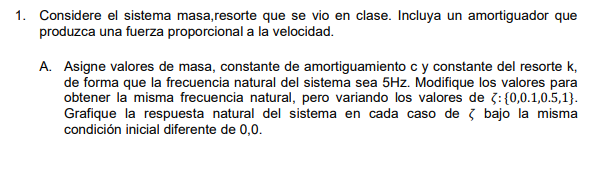

IMAGEN ASOCIADA

In [ ]:
#1. Asigne valores de masa, constante de amortiguamiento y constante del resorte
#de forma que la frecuencia natural del sistema sea 5hz.
fn = 5 #hertz
m = 1 #kg
c = 1 #kg/sec
omega_n = fn*2*pi  #como fn = 5hertz, y fn = wn/2pi,e tnonces wn = 2pi*fn = 2pi*5
k = (omega_n**2)*m

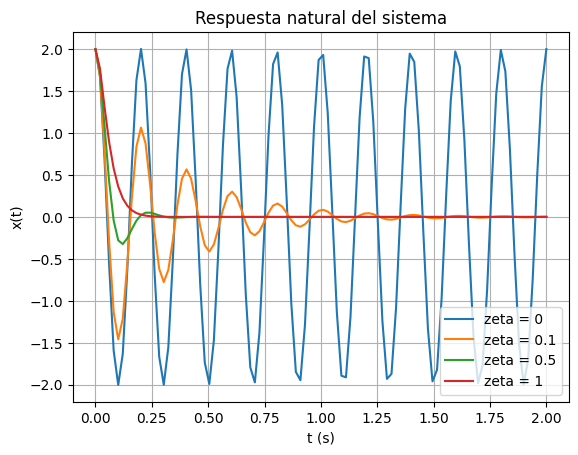

In [17]:
#2. Modifique los valores para obtener la misma frecuencia natural, pero variando los valores de zeta
zeta_list = [0,0.1,0.5,1]
fn = 5
m = 1
omega_n = (fn*2*pi)
k = (omega_n**2)*m

#Describimos la condición inicial
x = dynamicsymbols("x")
t = symbols("t")
x_0 = 2
x_dot_0 = 3

for zeta in zeta_list:
    c = zeta*(2*m)*omega_n
    ode = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x, 0)
    sol = dsolve(ode,ics = { x.subs(t,0): x_0, x.diff(t).subs(t,0): x_dot_0 })
    x_t = sol.rhs
    # Convertir solución a función numérica
    x_func = lambdify(t, x_t, 'numpy')

    # Vector de tiempo
    t_vals = np.linspace(0, 2, 100)

    # Evaluar
    x_vals = x_func(t_vals)

    # Graficar
    plt.plot(t_vals, x_vals, label = "zeta = " + str(zeta))
    plt.xlabel("t (s)")
    plt.ylabel("x(t)")
    plt.title("Respuesta natural del sistema")
    plt.grid(True)
plt.legend()
plt.show()



PUNTO 1. ÍTEM B. 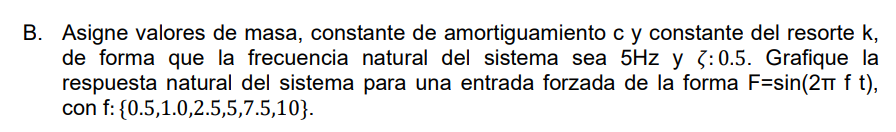

IMAGEN ASOCIADA

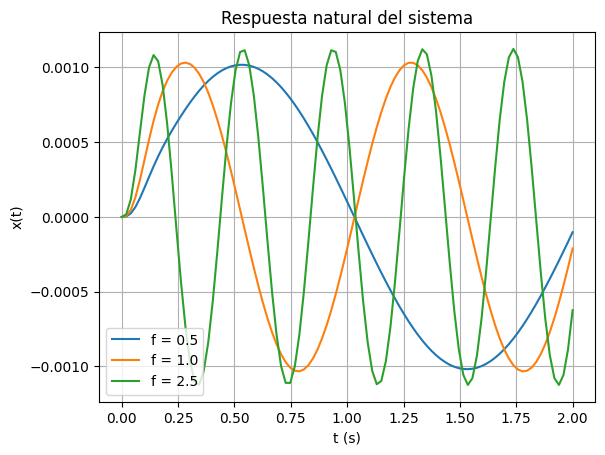

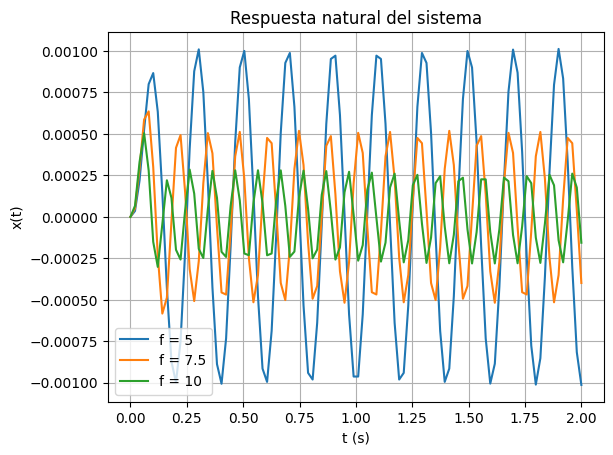

In [ ]:
#Este código es muy parecido al anterior, sólo que lo que varía es el t, ya no el zeta
#Además que en la ecuación que resuelve, se encuentra igualado, ya no a 0 sino a F = sin(2pif*t)

f_list = [0.5,1.0,2.5,5,7.5,10]
fn = 5
m = 1
omega_n = (fn*2*pi)
k = (omega_n**2)*m
zeta = 0.5
c = zeta*(2*m)*omega_n

#Suponemos que las condiciones iniciales son 0,0
x = dynamicsymbols("x")
t = symbols("t")

x_0 = 0
x_dot_0 = 0

for f in f_list[0:3]:
    F = sin(2*pi*f*t)
    ode = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x, F) #note que aquí tenemos la ecuación de la forma sumF = m*a_cm
    #Por tanto, no debemos convertir la fuerza dado que todo se encuentra en términos de fuerza, no de aceleración, que es cuando se incluyen el omega_n y el zeta en la ecuación
    sol = dsolve(ode,ics = { x.subs(t,0): x_0, x.diff(t).subs(t,0): x_dot_0 })
    x_t = sol.rhs
    # Convertir solución a función numérica
    x_func = lambdify(t, x_t, 'numpy')

    # Vector de tiempo
    t_vals = np.linspace(0, 2, 100)

    # Evaluar
    x_vals = x_func(t_vals)

    # Graficar
    plt.plot(t_vals, x_vals, label = "f = " + str(f))
    plt.xlabel("t (s)")
    plt.ylabel("x(t)")
    plt.title("Respuesta natural del sistema")
    plt.grid(True)
plt.legend()
plt.show()
for f in f_list[3:len(f_list)]:
    F = sin(2*pi*f*t)
    ode = Eq(m*x.diff(t,2) + c*x.diff(t) + k*x, F)
    sol = dsolve(ode,ics = { x.subs(t,0): x_0, x.diff(t).subs(t,0): x_dot_0 })
    x_t = sol.rhs
    # Convertir solución a función numérica
    x_func = lambdify(t, x_t, 'numpy')

    # Vector de tiempo
    t_vals = np.linspace(0, 2, 100)

    # Evaluar
    x_vals = x_func(t_vals)

    # Graficar
    plt.plot(t_vals, x_vals, label = "f = " + str(f))
    plt.xlabel("t (s)")
    plt.ylabel("x(t)")
    plt.title("Respuesta natural del sistema")
    plt.grid(True)
    
plt.legend()
plt.show()


PUNTO 2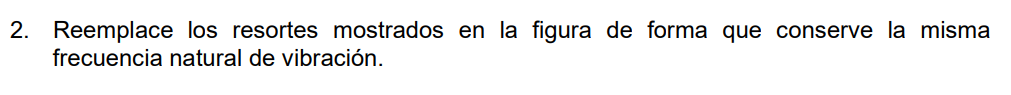

PUNTO 2.A


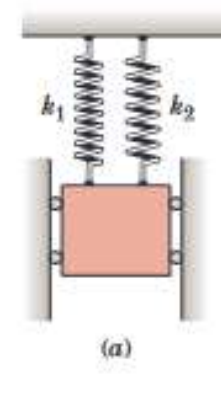

IMAGEN ASOCIADA

La frecuencia natural de vibración se refiere al
$$
Frecuencia_{natural} = \frac{W_n}{2*pi}
$$

Por tanto, para conservar la frecuencia natural del sistema es necesario conservar el W_n. Sin embargo, el W_n depende de la constante del resorte y la masa:

$$
W_n = \sqrt{\frac{k}{m}}
$$

Como la masa no la podemos cambiar, debemos cambiar el K. Así, se hace necesario hallar un K equivalente tanto para el ítem a) como para el ítem b). Para esto, planteemos la ecuación de fuerzas de este ítem a).

In [53]:
x = dynamicsymbols("x")
t = symbols("t")
k1, k2, m = symbols("k1, k2, m") 
#no hay peso, y por tanto tampoco g, pues suponemos que ya estamos en el equilibrio.
# Por lo que las fuerzas constantes como el peso ya se igualaron a las fuerzas del resorte.
# Así, los resortes no están en su longitud natural sino un poquito estirados. 

#Además, tampoco hay amortiguación dado que no aparece ningún amortiguador en el sistema.
#También, es un sistema libre y no forzado pues no hay ni una fuerza externa 
# ni tampoco la base sobre la que se sostienen los resortes parece moverse


#Ecuación de fuerzas
Eq_pos = Eq(m*x.diff(t,2) + (k1+k2)*x,0)
display(Eq_pos) 


m⋅ẍ + (k₁ + k₂)⋅x = 0

Notamos que modelar estas fuerzas sería lo mismo si asumimos un K equivalente igual a k1+k2. Por tanto, podemos reemplazar ambos resortes por un único resorte cuya constante sea igual a k1 + k2. Así, concluimos que:

$$
K_{\text{equivalente resorte paralelo}} =  \sum_{i=1}^{n} K_i
$$

Lo cual concuerda totalmente con la equivalencia que realiza el libro guía del curso entre la constante del resorte y la capacitancia. Hallar un resorte equivalente en paralelo es lo mismo que hallar una capacitancia equivalente en paralelo, lo cual es lo mismo que hallar una resistencia equivalente en serie.

PUNTO 2.B


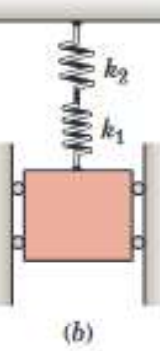

Para este caso, vamos a analizar cada cuerpo del sistema. Lo anterior, dado que no hay una relación directa entre el resortr 2 y el cuerpo de masa m.

In [54]:
#Resorte 2

#Este resorte, el cual se asume sin masa, sólo siente una fuerza del resorte 1 y una reacción en la pared 
x_1 = dynamicsymbols("x_1")
k1, F_pared = symbols("k1 F_pared") 
eq_r_2 = Eq(k1*x_1 - F_pared,0) #Esto en el eje y. Es igual a 0 porque se asume sin masa.
display(eq_r_2)

-F_pared + k₁⋅x₁ = 0

In [55]:
#Resorte 1
#Este resorte, el cual se asume sin masa, sólo siente una fuerza del resorte 2 y una fuerza de la masa
x_2 = dynamicsymbols("x_2")
t = symbols("t")
k2 = symbols("k2") 
F_masa = symbols("F_masa") #esta es la que queremos hallar
eq_r_1 = Eq(x_2*k2 - F_masa,0) #Esto en el eje y. Es igual a 0 porque se asume sin masa.
display(eq_r_1)

-Fₘₐₛₐ + k₂⋅x₂ = 0

Por tanto:de estas ecuaciones podemos deducir que
$$
F_{pared} = k1*x1
\\
F_{masa} = k2*x2
$$

Pero además también, la fuerza de la masa debe ser la misma de la pared: puesto que los resortes actúan como transmisores de fuerza. Por tanto:
$$
F_{pared} = F_{masa} \\
k1*x1 = k2*x2
$$

Así, podemos establecer una fuerza total que sea igual a estas. Despejando para x1 y x2 obtenemos que:

$$
F_{total} = k1*x1 = k2*x2 ==> x1 =\frac{F_{total}}{k1}, x2 =\frac{F_{total}}{k2}
$$

Ahora bien, recordemos que la extensión total de la masa (x) está en función de cuánto se extienda
cada resorte (x1 y x2), por tanto:
$$
x = x1 + x2
$$

Por tanto:
$$
x = \frac{F_{total}}{k1} + \frac{F_{total}}{k2}
$$

De esta forma, llegamos a que:
$$
x = {F_{total}}*(\frac{1}{k1}  + \frac{1}{k2})
$$

Y, finalmente, tenemos que:
$$
F_{total} = x*(\frac{1}{(\frac{1}{k1}  + \frac{1}{k2})}) ==>

F_{total} = x*(\frac{k1*k2}{k1+k2})

$$


Y por tanto, concluimos que:
$$
\frac{1}{K_{\text{equivalente resorte serie}}} =  \sum_{i=1}^{n} \frac{1}{K_i}
$$

Así, podemos reemplazar el sistema de resortes en serie por un solo resorte con una K descrita por la anterior ecuación. Por tanto, se concluye que, para resortes en serie, actúan como capacitadores en serie los cuales actúan como resistencias en paralelo.


In [56]:
x = dynamicsymbols("x")
t = symbols("t")
k1, k2, m = symbols("k1, k2, m") 

#Ecuación de fuerzas
Eq_pos = Eq(m*x.diff(t,2) + (k1*k2/(k1+k2))*x,0)
display(Eq_pos) 

k₁⋅k₂⋅x          
─────── + m⋅ẍ = 0
k₁ + k₂          

PUNTO 3

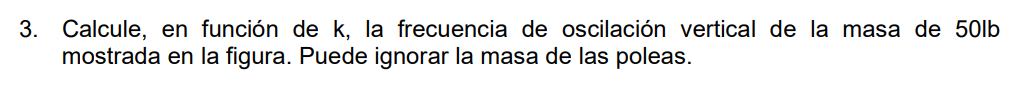
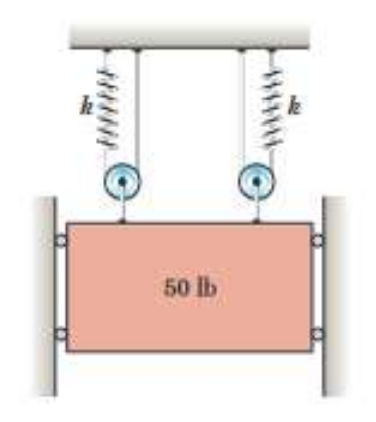

In [72]:
x = dynamicsymbols("x")
k = symbols("k")
T = symbols("T")
F_masa = symbols("F_masa")
m = 50 #libras

#Para la polea de la izquierda
eq_pol_1 = Eq(k*x + T , F_masa)

#Para la polea de la izquierda
eq_pol_2 = Eq(k*x/2 + T , F_masa)

#Para el cuerpo
eq_cuerpo = Eq(F_masa + F_masa+ m*x.diff(t,t),0) #sumF = m*a_cm

#Pero recordemos que como es una sola cuerda la que pasa por la polea, la fuerza de un lado
#debe ser igual a la fuerza del otro. Por tanto, T = k*x, lo cual lleva a
F_masa_value = solve(eq_pol_1.subs({T:k*x}))
display(F_masa_value)

#No obstante. Notemos que esta X de F_masa value corresponde a la X que avanza la cuerda.
#Sin embargo, si cada cuerda avanza X, esto implica que en total la caja avanzó 2X. Así, debemos multiplicar este valor por 2.

f_cuerpo = eq_cuerpo.subs({F_masa:F_masa_value[0][F_masa]*2})
f_cuerpo

[{Fₘₐₛₐ: 2⋅k⋅x}]

8⋅k⋅x + 50⋅ẍ = 0

Notamos que podemos modelar este sistema como con una K equivalente igual a 8k. Por tanto, utilizando que:
$$
K_{equivalente} = 8*k
$$

$$
Frecuencia_{natural} = \frac{W_n}{2*pi}
$$

$$
W_n = \sqrt{\frac{k}{m}}
$$

In [73]:
w_n = ((8*k)/m)**(1/2)
frecuencia_natural = w_n/(2*pi)
display(frecuencia_natural)

     0.5
0.2⋅k   
────────
   π    

PUNTO 4

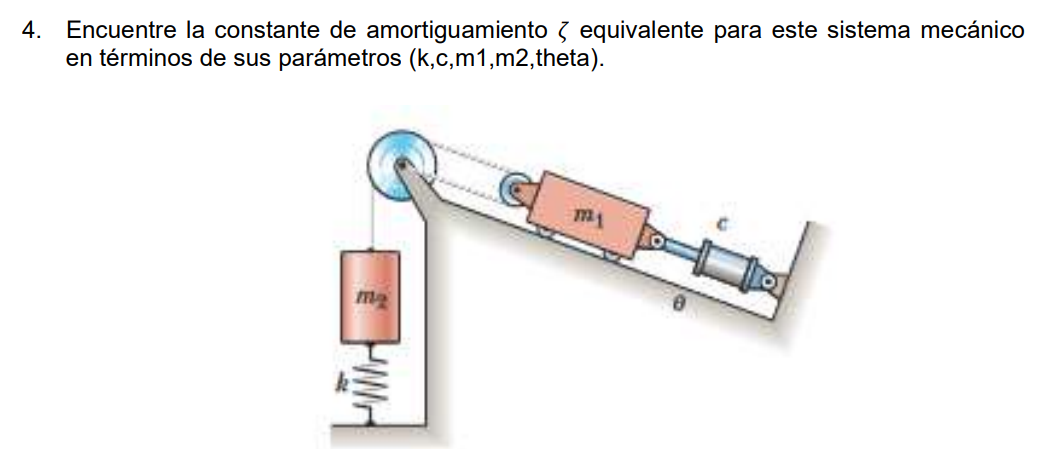

In [96]:
N = ReferenceFrame("N")
k,c,m1,m2,theta = symbols("k,c,m1,m2,theta")
A = N.orientnew("A", "Axis", (pi/2-theta,N.z))
T1, T2 = symbols("T1, T2")

#Vectores que miden las posiciones de la masa 2 (x) y la masa 1 (y)
x = dynamicsymbols("x")
y = dynamicsymbols("y")

#Para la masa 2
eq_fuerzas_m2 = T1*N.y - k*x*N.y -m2*x.diff(t,t)*N.y #sumF = m*a_cm ==> sumF - m*a_cm = 0

#Para la polea
eq_fuerzas_polea = -2*T1*A.y + T2*A.y #la polea siente 3 fuerzas. Como no tiene masa, la sumatoria de fuerzas debe ser 0.

#Para la masa 1
F_amortiguador = -c*y.diff(t)*A.y
eq_fuerzas_m1 = -T2*A.y + F_amortiguador -m1*y.diff(t,t)*A.y #sumF = m*a_cm ==> sumF - m*a_cm = 0


#Hallamos el valor de T1 y T2 en función de nuestras variables
eqs = [eq_fuerzas_polea.dot(N.x),eq_fuerzas_polea.dot(N.y), eq_fuerzas_m2.dot(N.y)]
t_value = solve(eqs, [T1,T2])
display(t_value)

#Ahora bien, debemos tener en cuenta 1 ecuación adicional:
#x = y/2 ó equivalentemente 2x = y. Lo anterior, dado que, al estar conectadas por poleas, si la masa 1 se mueve 1 unidad
#entonces la masa 2 se moverá 0.5 unidades.
#Por tanto, planteamos las ecuaciones:
eq_subs = eq_fuerzas_m1.subs({T2:t_value[T2], y:x/2})*(-2) #como está igualada a 0, podemos mulitplicar por -2 para que todo quede positivo, 
display(eq_subs)
 

{T₁: k⋅x + m₂⋅ẍ, T₂: 2⋅k⋅x + 2⋅m₂⋅ẍ}

⎛                          2             ⎞    
⎜    d ⎛x⎞                d  ⎛x⎞         ⎟    
⎜2⋅c⋅──⎜─⎟ + 4⋅k⋅x + 2⋅m₁⋅───⎜─⎟ + 4⋅m₂⋅ẍ⎟ a_y
⎜    dt⎝2⎠                  2⎝2⎠         ⎟    
⎝                         dt             ⎠    

In [98]:
#De esta forma, podemos hacer una comparación entre estas ecuaciones y un sistema normal, definido por:
# (c_eq)*x_dot + k_eq*x + m_eq*x_dot_dot

#Así, tenemos que:
# c_eq = 2c/2 = c
# k_eq = 4*k
# m_eq = 2*m1/2 + 4*m2 = m1 + 4*m2
C_eq = c
K_eq = 4*k
M_eq = m1 + 4*m2
W_neq = (K_eq/M_eq)**(1/2)

#Y así podemos calcular zeta, zeta = C/(2*m*w_n)
Zeta_eq = C_eq/(2*M_eq*W_neq)
display(Zeta_eq.simplify())

                  -0.5
       ⎛    k    ⎞    
0.25⋅c⋅⎜─────────⎟    
       ⎝m₁ + 4⋅m₂⎠    
──────────────────────
      m₁ + 4⋅m₂       

El único problema de este resultado es, tal como aparece en el resultado de la celda anterior, que está expresado en el marco A. Por tanto, se hace necesario expresarlo en el marco global.

In [99]:
Zeta_eq*A.y.express(N)

                  -0.5                                -0.5           
       ⎛    k    ⎞                         ⎛    k    ⎞               
-0.5⋅c⋅⎜─────────⎟    ⋅cos(θ)        0.5⋅c⋅⎜─────────⎟    ⋅sin(θ)    
       ⎝m₁ + 4⋅m₂⎠                         ⎝m₁ + 4⋅m₂⎠               
────────────────────────────── n_x + ──────────────────────────── n_y
         2⋅m₁ + 8⋅m₂                         2⋅m₁ + 8⋅m₂             